# Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu, levene, shapiro
from statsmodels.stats.power import ttest_power
from statsmodels.stats.proportion import proportions_ztest
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols

# Read the data as a data frame

In [2]:
df = pd.read_csv('insurance-final test.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Shape of the data

In [3]:
df.shape
#we have 1338 rows and 7 columns

(1338, 7)

In [4]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


# Data type of each attribute

In [5]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

# A look at our features

In [6]:
# 'children' is a numerical discrete feature - how many children does aperson has?
# 'charges' and 'age' are numerical continuous features

# 'bmi' is also a continuous feature - it could be ordinal if we categorize bmi - eg: a person with a bmi between a to b can be 
# overwight, similarly between b-c is underweight and c-d is fit. But here we are not categorizing it but instead treating
# it like a continous variable

# 'smoker' is categorical feature - (yes/no)
# 'sex' is nominal feature - (male/female)
# 'region' is multi-nominal feature - (southeast,southwest,northeast,northwest)

In [7]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Checking the presence of missing values

In [8]:
df.isnull().sum()

#hence there are no missing values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# mean,median,mode of our features

In [9]:
df.mean()

age            39.207025
bmi            30.663397
children        1.094918
charges     13270.422265
dtype: float64

In [10]:
df.median()

age           39.000
bmi           30.400
children       1.000
charges     9382.033
dtype: float64

In [11]:
df.mode()
#frequency of people with no children is maximum
#frequency of non smokers is maximum
#frequency of people in southeast region is maximum
#frequency of males is maximum
#maximum people are of 18 years

,age,sex,bmi,children,smoker,region,charges
0,18,male,32.3,0,no,southeast,1639.5631


# 5 point summary of numerical attributes - max, min, median, 25 percentile, 75 percentile
## we have 4 numerical columns - age,bmi,children,charges

In [12]:
#age
print('max age: '+str(np.max(df['age'])))
print('min age: '+str(np.min(df['age'])))
print('median or 50th percentile of age: '+str(np.median(df['age'])))
print('25th percentile of age or 25% of the age is or below: '+str(np.percentile(a=df['age'], q=25)))
print('75th percentile of age or 75% of the age is or below: '+str(np.percentile(a=df['age'], q=75)))

max age: 64
min age: 18
median or 50th percentile of age: 39.0
25th percentile of age or 25% of the age is or below: 27.0
75th percentile of age or 75% of the age is or below: 51.0


In [13]:
#bmi
print('max bmi: '+str(np.max(df['bmi'])))
print('min bmi: '+str(np.min(df['bmi'])))
print('median or 50th percentile of bmi: '+str(np.median(df['bmi'])))
print('25th percentile of bmi or 25% of the bmi is or below: '+str(np.percentile(a=df['bmi'], q=25)))
print('75th percentile of bmi or 75% of the bmi is or below: '+str(np.percentile(a=df['bmi'], q=75)))

max bmi: 53.13
min bmi: 15.96
median or 50th percentile of bmi: 30.4
25th percentile of bmi or 25% of the bmi is or below: 26.29625
75th percentile of bmi or 75% of the bmi is or below: 34.69375


In [14]:
#children
print('max children: '+str(np.max(df['children'])))
print('min children: '+str(np.min(df['children'])))
print('median or 50th percentile of children: '+str(np.median(df['children'])))
print('25th percentile of children or 25% of the people have children '+str(np.percentile(a=df['children'], q=25))+' or below: '+str(np.percentile(a=df['children'], q=25)))
print('75th percentile of children or 75% of the people have children '+str(np.percentile(a=df['children'], q=75))+' or below: '+str(np.percentile(a=df['children'], q=75)))

max children: 5
min children: 0
median or 50th percentile of children: 1.0
25th percentile of children or 25% of the people have children 0.0 or below: 0.0
75th percentile of children or 75% of the people have children 2.0 or below: 2.0


In [15]:
#charges
print('max charges: '+str(np.max(df['charges'])))
print('min charges: '+str(np.min(df['charges'])))
print('median or 50th percentile of charges: '+str(np.median(df['charges'])))
print('25th percentile of charges or 25% of the charges are or below: '+str(np.percentile(a=df['charges'], q=25)))
print('75th percentile of charges or 75% of the charges are or below: '+str(np.percentile(a=df['charges'], q=75)))

max charges: 63770.42801
min charges: 1121.8739
median or 50th percentile of charges: 9382.033
25th percentile of charges or 25% of the charges are or below: 4740.28715
75th percentile of charges or 75% of the charges are or below: 16639.912515


# Distribution of ‘bmi’, ‘age’ and ‘charges’ columns

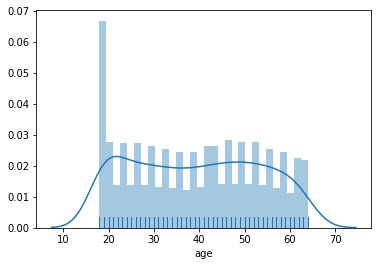

In [16]:
#age
sns.distplot(df['age'], rug=True,bins=30)

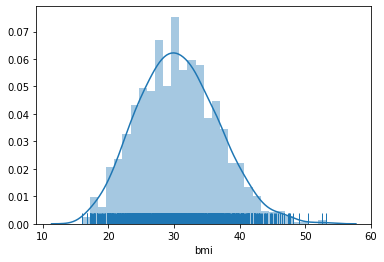

In [17]:
#bmi
sns.distplot(df['bmi'], rug=True,bins=30)

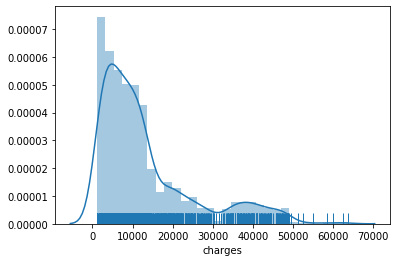

In [18]:
#charges
sns.distplot(df['charges'], rug=True,bins=30)

# Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [19]:
df.skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

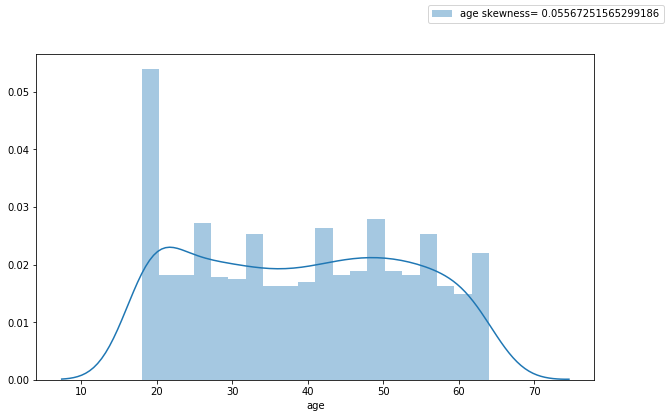

In [20]:
fig = plt.figure(figsize=(10,6))
sns.distplot(df['age'],bins=20)
fig.legend(labels=['age skewness= '+str(df['age'].skew())])

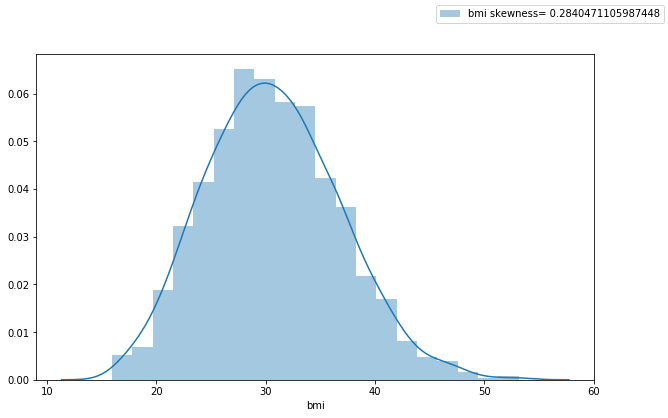

In [21]:
fig = plt.figure(figsize=(10,6))
sns.distplot(df['bmi'],bins=20)
fig.legend(labels=['bmi skewness= '+str(df['bmi'].skew())])

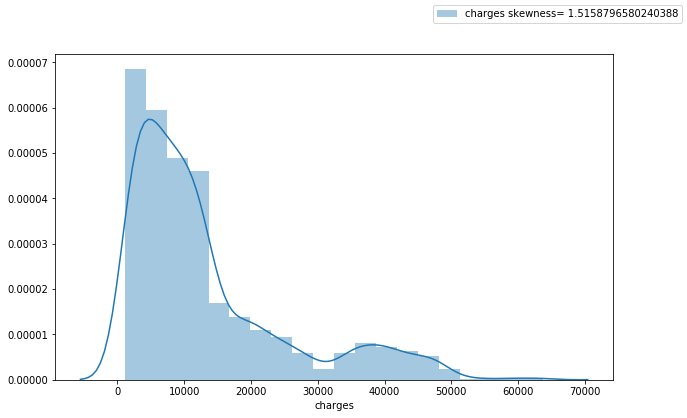

In [22]:
fig = plt.figure(figsize=(10,6))
sns.distplot(df['charges'],bins=20)
fig.legend(labels=['charges skewness= '+str(df['charges'].skew())])

# Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns
###### Q3+1.5(IQR) < outlier < Q1-1.5(IQR)

## bmi

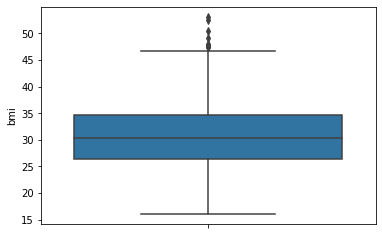

In [23]:
sns.boxplot(y='bmi',data=df)

In [24]:
Q1 = np.percentile(a=df['bmi'], q=25)
Q3 = np.percentile(a=df['bmi'], q=75)
IQR = Q3 - Q1
print(IQR)

ul = Q3+(1.5*IQR) 
ll = Q1-(1.5*IQR)
print('lower limit: '+str(ll))
print('upper limit: '+str(ul))
print(str(Q3+(1.5*IQR))+'< outlier < '+str(Q1-(1.5*IQR)))

8.3975
lower limit: 13.7
upper limit: 47.290000000000006
47.290000000000006< outlier < 13.7


In [25]:
df[(df['bmi']>ul) | (df['bmi']<ll)]
#these are the outliers - there are a total of 9 outliers

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
401,47,male,47.52,1,no,southeast,8083.91980
543,54,female,47.41,0,yes,southeast,63770.42801
847,23,male,50.38,1,no,southeast,2438.05520
860,37,female,47.60,2,yes,southwest,46113.51100
1047,22,male,52.58,1,yes,southeast,44501.39820
1088,52,male,47.74,1,no,southeast,9748.91060
1317,18,male,53.13,0,no,southeast,1163.46270


## age

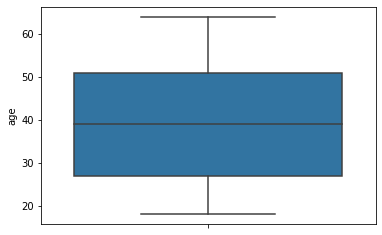

In [26]:
sns.boxplot(y='age',data=df)

In [27]:
Q1 = np.percentile(a=df['age'], q=25)
Q3 = np.percentile(a=df['age'], q=75)
IQR = Q3 - Q1
print(IQR)

ul = Q3+(1.5*IQR) 
ll = Q1-(1.5*IQR)
print('lower limit: '+str(ll))
print('upper limit: '+str(ul))
print(str(Q3+(1.5*IQR))+'< outlier < '+str(Q1-(1.5*IQR)))

24.0
lower limit: -9.0
upper limit: 87.0
87.0< outlier < -9.0


In [28]:
df[(df['age']>ul) | (df['age']<ll)]
#these are the outliers - there are no outliers

,age,sex,bmi,children,smoker,region,charges


## charges

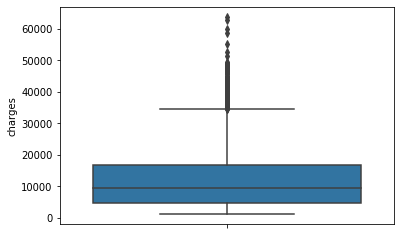

In [29]:
sns.boxplot(y='charges',data=df)

In [30]:
Q1 = np.percentile(a=df['charges'], q=25)
Q3 = np.percentile(a=df['charges'], q=75)
IQR = Q3 - Q1
print(IQR)

ul = Q3+(1.5*IQR) 
ll = Q1-(1.5*IQR)
print('lower limit: '+str(ll))
print('upper limit: '+str(ul))
print(str(Q3+(1.5*IQR))+'< outlier < '+str(Q1-(1.5*IQR)))

11899.625365
lower limit: -13109.1508975
upper limit: 34489.350562499996
34489.350562499996< outlier < -13109.1508975


In [31]:
df[(df['charges']>ul) | (df['charges']<ll)]
#these are the outliers - there are a total of 139 outliers

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1313,19,female,34.700,2,yes,southwest,36397.57600


# Treatment of outliers

In [32]:
#we have 9 outliers in bmi column and 139 outliers in charges column

#for bmi column we will replace ouliers with maximum occurring bmi's i.e mode of bmi
#while for charges column we will replace outliers with median values 

#since outliers have little affect on median and mode hence median/mode will be more representative of our data. 

In [33]:
df.mode()

,age,sex,bmi,children,smoker,region,charges
0,18,male,32.3,0,no,southeast,1639.5631


In [34]:
df.median()

age           39.000
bmi           30.400
children       1.000
charges     9382.033
dtype: float64

In [35]:
#here we can see that median(30.4) and mode(32.3) for bmi is almost similar. Hence we can choose either of them. We will
#choose mode to replace outliers in bmi column.
#also, distribution of bmi is normal hence mode and median are approximately same. 

#however, we see that median(9382.03) and mode(1639.56) for charges column are very different. Although mode is 
#highest occuring charges, but median is more representative of the charges column. Hence we will choose median to replace
#outliers in charges column 
#charges have a positively skewed distribution which means mode < median. Mode is simply highest occurring hence median is 
#a better option to replace with.

###### bmi column treatment

In [36]:
#upper limit for bmi was 47.290000000000006,lower limit was 13.7 and replaced with mode=32.3

df['bmi'][(df['bmi']>47.290000000000006) | (df['bmi']<13.7)] = 32.3

C:\Users\sunaal\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [37]:
df[(df['bmi']>47.290000000000006) | (df['bmi']<13.7)]
#outliers in bmi column have been updated to the mode of the bmi

,age,sex,bmi,children,smoker,region,charges


###### charges column treatment

In [38]:
#upper limit for charges was 34489.350562499996,lower limit was -13109.1508975 and replaced with median=9382.033

df['charges'][(df['charges']>34489.350562499996) | (df['charges']<-13109.1508975)] = 9382.033

C:\Users\sunaal\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [39]:
df[(df['charges']>34489.350562499996) | (df['charges']<-13109.1508975)]
#outliers in charges column have been updated to the median of the charges

,age,sex,bmi,children,smoker,region,charges


# changes in mode median mean for charges and bmi after treatment

In [40]:
df.mean()

age           39.207025
bmi           30.549204
children       1.094918
charges     9871.060475
dtype: float64

In [41]:
df.mode()

,age,sex,bmi,children,smoker,region,charges
0,18,male,32.3,0,no,southeast,9382.033


In [42]:
df.median()

age           39.00000
bmi           30.40000
children       1.00000
charges     9379.96885
dtype: float64

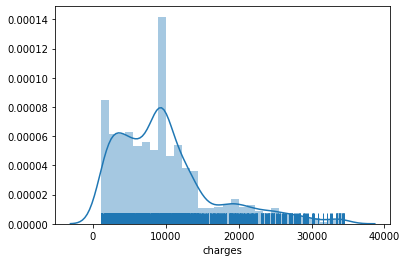

In [43]:
sns.distplot(df['charges'], rug=True,bins=30)

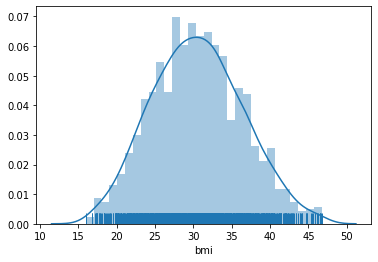

In [44]:
sns.distplot(df['bmi'], rug=True,bins=30)

# data visualization to plot correlation matrix.

#### 1)

In [45]:
corr_matrix = df.corr()

In [46]:
corr_matrix

,age,bmi,children,charges
age,1.000000,0.114314,0.042469,0.413577
bmi,0.114314,1.000000,0.016982,-0.064465
children,0.042469,0.016982,1.000000,0.079165
charges,0.413577,-0.064465,0.079165,1.000000


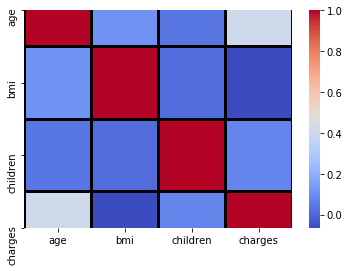

In [47]:
sns.heatmap(corr_matrix,cmap="coolwarm",linewidth=2,linecolor='black')

#### 2) correlation of between sex and region based on charges

In [48]:
p = df.pivot_table(index="sex",columns="region",values="charges")
p

region,northeast,northwest,southeast,southwest
sex,,,,
female,10788.228435,10623.310453,9895.667129,8886.987562
male,10452.306676,9977.103526,9218.721599,9230.303395


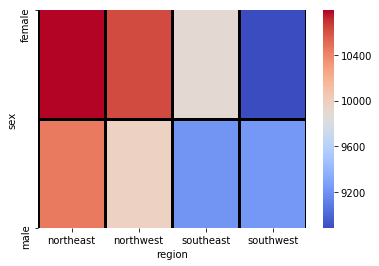

In [49]:
sns.heatmap(p,cmap="coolwarm",linewidth=2,linecolor='black')

#charges between female and northeast region have highest correlation
#while charges between southwest and females have least correlation

#### 3) correlation between sex and number of children based on bmi

In [50]:
pp = df.pivot_table(index="sex",columns="children",values="bmi")
pp

children,0,1,2,3,4,5
sex,,,,,,
female,30.309239,30.052658,30.388697,30.436429,31.943182,30.620625
male,30.609825,30.750361,31.300992,30.922937,30.957500,28.792500


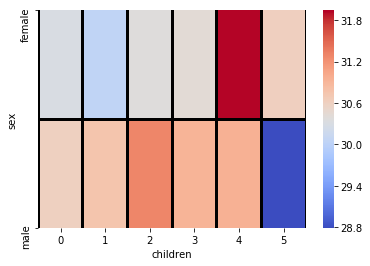

In [51]:
sns.heatmap(pp,cmap="coolwarm",linewidth=2,linecolor='black')

#females with 4 children have higher correlation while men with 5 children have lowest correlation with respect to bmi

# scatter plot

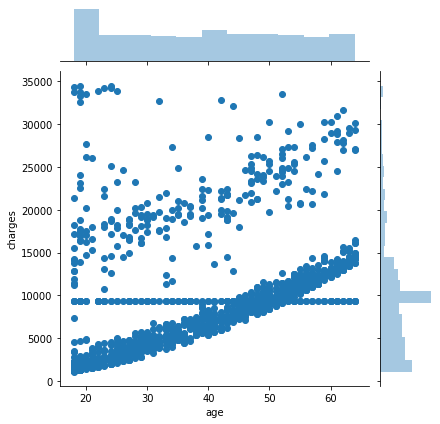

In [52]:
sns.jointplot(x='age',y='charges',data=df)

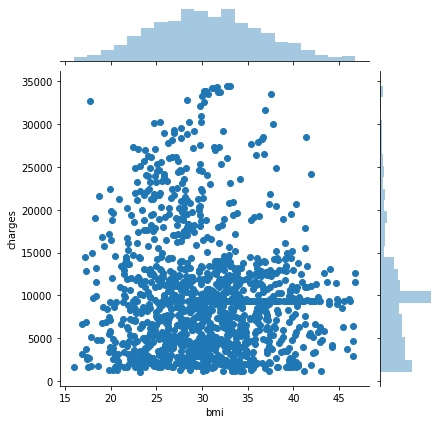

In [53]:
sns.jointplot(x='bmi',y='charges',data=df)

# Distribution of categorical columns (include children)

male      676
female    662
Name: sex, dtype: int64

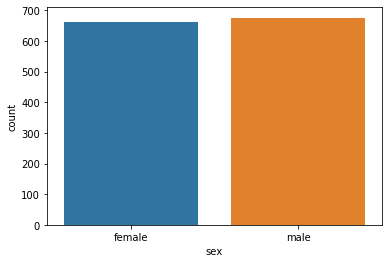

In [54]:
sns.countplot(x='sex',data=df)
#no. of male and female

df['sex'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

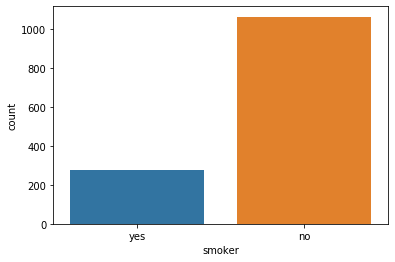

In [55]:
sns.countplot(x='smoker',data=df)
#no. of smokers and non smokers

df['smoker'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

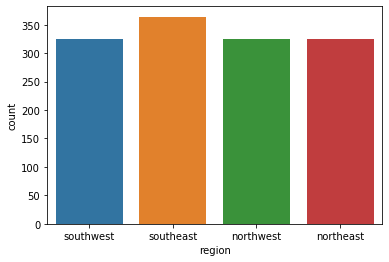

In [56]:
sns.countplot(x='region',data=df)
#frequency of people in different regions

df['region'].value_counts()

avg male bmi: 30.785421597633103
avg female bmi: 30.307990936555917


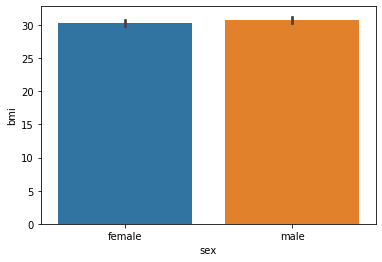

In [57]:
sns.barplot(x='sex',y='bmi',data=df)
#avg bmi of male and female - both are around 30-31

print('avg male bmi: '+str(df[df['sex']=='male']['bmi'].mean()))
print('avg female bmi: '+str(df[df['sex']=='female']['bmi'].mean()))

avg male charges: 9699.582087736675
avg female charges: 10046.165294318711


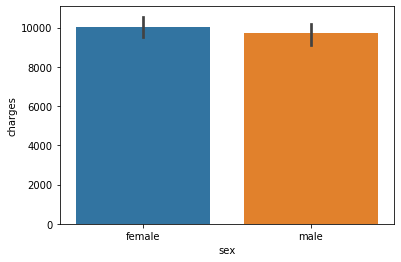

In [58]:
sns.barplot(x='sex',y='charges',data=df)
#avg charges of male and female

print('avg male charges: '+str(df[df['sex']=='male']['charges'].mean()))
print('avg female charges: '+str(df[df['sex']=='female']['charges'].mean()))

male      159
female    115
Name: sex, dtype: int64

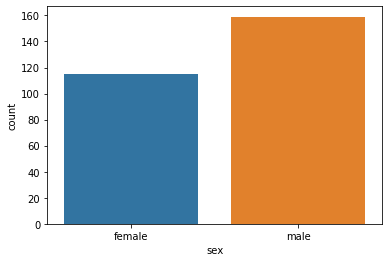

In [59]:
dff= df[df['smoker']=='yes']
sns.countplot(x='sex',data=dff)
#number of female and male smokers

dff['sex'].value_counts()

male      104
female     96
Name: sex, dtype: int64

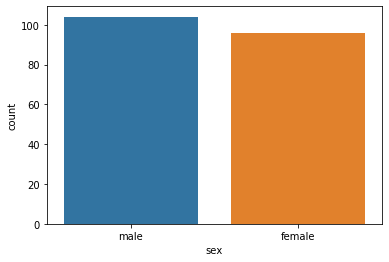

In [60]:
sns.countplot(x='sex',data=df[df['children']>=3])
#number of males and females with 3 or more children

df[df['children']>=3]['sex'].value_counts()

female    25
male      23
Name: sex, dtype: int64

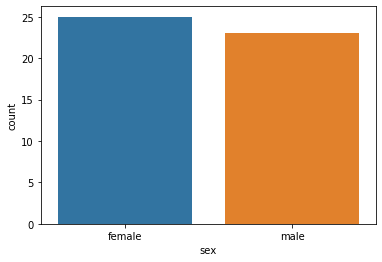

In [61]:
#males and females under 25 with 2 or 2+ children
age_under_25 = df[df['age']<25]

sns.countplot(x='sex',data=age_under_25[age_under_25['children']>=2])

age_under_25[age_under_25['children']>=2]['sex'].value_counts()

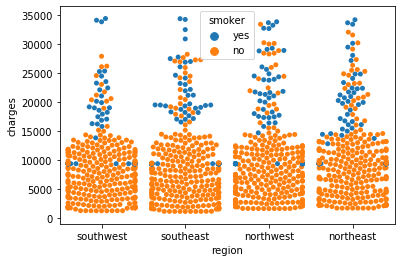

In [62]:
#region wise charges of smokers and non smokers
sns.swarmplot(x='region',y='charges',data=df,hue='smoker')

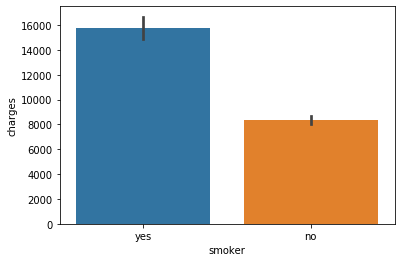

In [63]:
#chargers of smokers vs non smokers
sns.barplot(x='smoker',y='charges',data=df)

#smokers on an average have higher charges

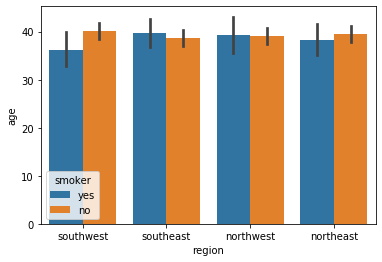

In [64]:
sns.barplot(x='region',y='age',data=df,hue="smoker")

#in southwest and northeast regions, smokers on an average have lesser age

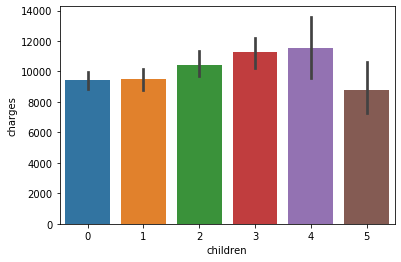

In [65]:
sns.barplot(x='children',y='charges',data=df)
#people with 3 and 4 children have higher charges, while people wih 5 children have lesser charges

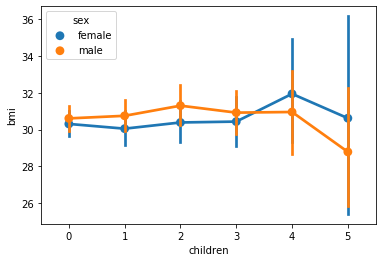

In [66]:
sns.pointplot(x='children',y='bmi',data=df,hue="sex")

#distribution of bmi of male and female according to number of children

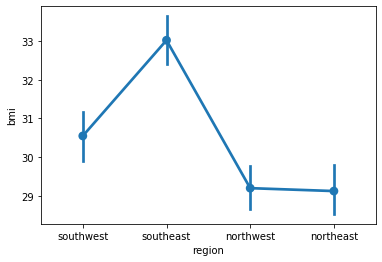

In [67]:
#region wise bmi of people
sns.pointplot(x="region", y="bmi", data=df)

#bmi of people in southeast region is higher

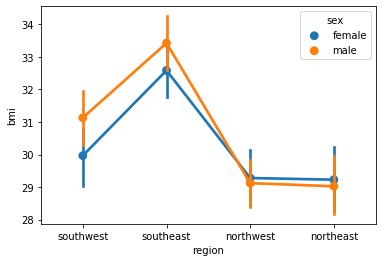

In [68]:
#region wise bmi of male and female
sns.pointplot(x="region", y="bmi", data=df,hue="sex")

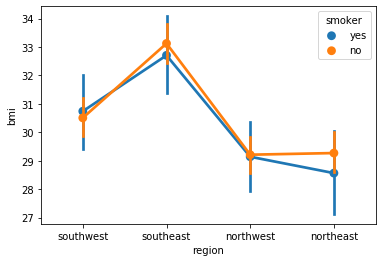

In [69]:
#region wise bmi of smoker and non smoker
sns.pointplot(x="region", y="bmi", data=df,hue="smoker")

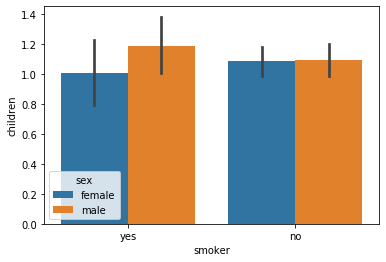

In [70]:
sns.barplot(x='smoker',y='children',data=df,hue='sex')

#female smokers on an average have less children than men smokers
#while non-smokers(both make and female) have approximately same no. of children on an average

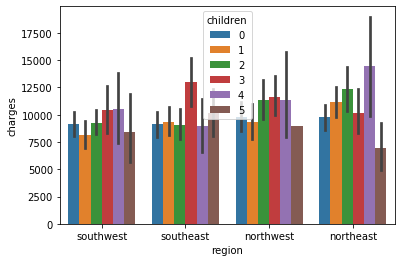

In [71]:
sns.barplot(x='region',y='charges',data=df,hue="children")

#in northwest and southeast regions, people with 3 children have highest charges
#however in southwest and northeast regions, people with 4 children tend to have higher charges

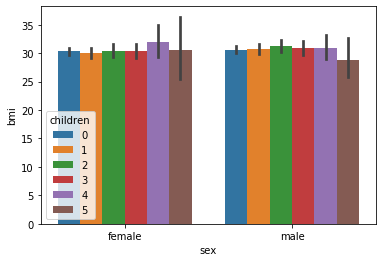

In [72]:
sns.barplot(x='sex',y='bmi',data=df,hue="children")
#females with 4 children tend to have higher bmi
#while males have almost same bmi except males with 5 children tend to have lower bmi 

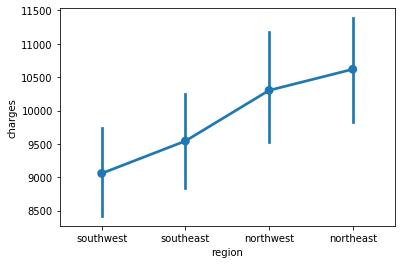

In [73]:
sns.pointplot(x="region", y="charges", data=df)

#people in northeast regions have higher charges

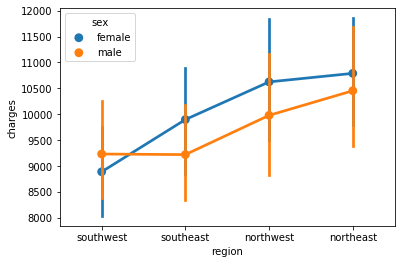

In [74]:
sns.pointplot(x="region", y="charges", data=df,hue="sex")

#females usually have higher charges in all regions however in 
#southwest region males have higher charges

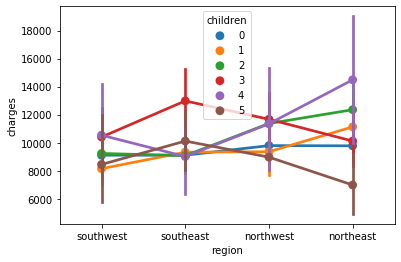

In [75]:
sns.pointplot(x="region", y="charges", data=df,hue="children")

#region wise charges based on no. of children

# Pair plot that includes all the columns of the data frame

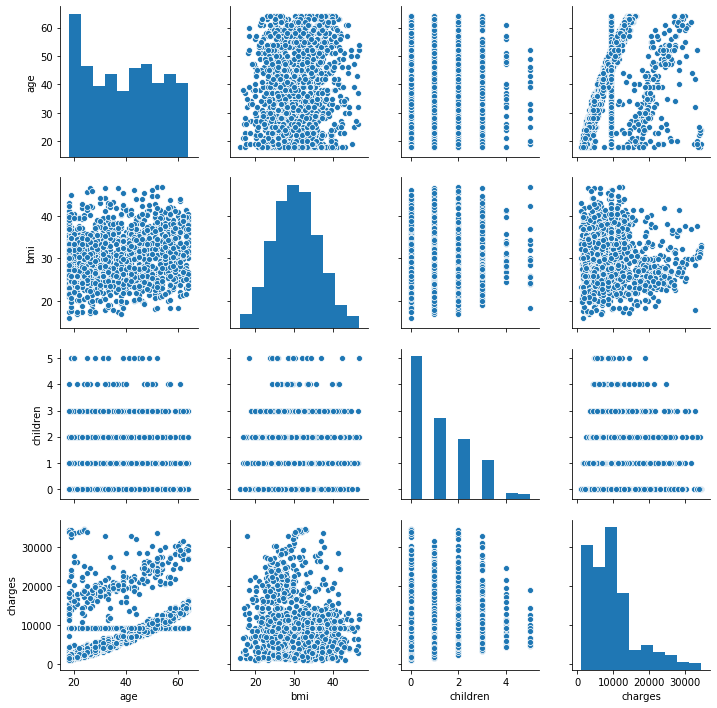

In [76]:
sns.pairplot(df)

# Do charges of people who smoke differ significantly from the people who don't? 

### we will use 2 independent sample t-test to compare charges of smokers and nonsmokers
#### Ho : mean charges of smokers = mean charges of nonsmokers
#### Ho : mean charges of smokers != mean charges of nonsmokers
###### alpha level = 0.5

In [77]:
smoker_df = df[df['smoker']=='yes']
smoker_df['charges'].mean()

15744.24223718975

In [78]:
nonsmoker_df = df[df['smoker']=='no']
nonsmoker_df['charges'].mean()

8358.605773645677

In [79]:
t_statistic, p_value = ttest_ind(smoker_df['charges'], nonsmoker_df['charges'])
print(t_statistic, p_value)

17.650615787804735 7.776333154358047e-63


since p-value < 0.05, therefore we reject the null hypothesis and can say that charges of smoker and nonsmokers differ significantly

# Does bmi of males differ significantly from that of females?

### again, we will use 2 independent sample t-test to compare bmi of males and females
#### Ho : mean bmi of males = mean bmi of females
#### Ho : mean bmi of males != mean bmi of females
###### alpha level = 0.5

In [80]:
male_df = df[df['sex']=='male']
male_df['bmi'].mean()

30.785421597633103

In [81]:
female_df = df[df['sex']=='female']
female_df['bmi'].mean()

30.307990936555917

In [82]:
t_statistic, p_value = ttest_ind(female_df['bmi'], male_df['bmi'])
print(t_statistic, p_value)

-1.4801210710968227 0.139076704411994


since p-value > 0.05, therefore we fail to reject the null hypothesis and can say that bmi's of male and female do not differ significantly

# Is the proportion of smokers significantly different in different genders?

### here we will use z test of proportions to compare proportion of smokers in males and females
#### Ho : proportions are same
#### Ho : proportions differ
###### alpha level = 0.5

In [83]:
smoker_m = df[(df['smoker']=='yes') & (df['sex']=='male')]
smoker_m

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,9382.03300
19,30,male,35.300,0,yes,southwest,9382.03300
29,31,male,36.300,2,yes,southwest,9382.03300
30,22,male,35.600,0,yes,southwest,9382.03300
34,28,male,36.400,1,yes,southwest,9382.03300
...,...,...,...,...,...,...,...
1301,62,male,30.875,3,yes,northwest,9382.03300
1303,43,male,27.800,0,yes,southwest,9382.03300
1304,42,male,24.605,2,yes,northeast,21259.37795
1307,32,male,28.120,4,yes,northwest,21472.47880


In [84]:
smoker_f = df[(df['smoker']=='yes') & (df['sex']=='female')]
smoker_f

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
11,62,female,26.290,0,yes,southeast,27808.72510
23,34,female,31.920,1,yes,northeast,9382.03300
58,53,female,22.880,1,yes,southeast,23244.79020
64,20,female,22.420,0,yes,northwest,14711.74380
...,...,...,...,...,...,...,...
1308,25,female,30.200,0,yes,southwest,33900.65300
1313,19,female,34.700,2,yes,southwest,9382.03300
1314,30,female,23.655,3,yes,northwest,18765.87545
1323,42,female,40.370,2,yes,southeast,9382.03300


In [85]:
#total no. of male and females
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [86]:
#total no. of female smokers
smoker_f['sex'].value_counts()

female    115
Name: sex, dtype: int64

In [87]:
#total no. of male smokers
smoker_m['sex'].value_counts()

male    159
Name: sex, dtype: int64

In [88]:
print("proportion of female smokers: "+str(115/662))
print("proportion of male smokers: "+str(159/676))

proportion of female smokers: 0.17371601208459214
proportion of male smokers: 0.23520710059171598


In [89]:
z_st, pv = proportions_ztest([smoker_f['sex'].value_counts()[0], smoker_m['sex'].value_counts()[0]] , [df['sex'].value_counts()[1], df['sex'].value_counts()[0]])
print(z_st, pv)

-2.7867402154855503 0.005324114164320532


since p-value < 0.05, therefore we reject the null hypothesis and can say that proportions of smokers in male and female differ significantly

# Is the distribution of bmi across women with no children, one child and two children, the same? 

### here we will use ANOVA to check variability in bmi within women with no child, one child and two children
#### Ho : variability is same across all three groups
#### Ho : bmi of atleast 1 group varies
###### alpha level = 0.5

In [90]:
#bmi's of women with no child 
w_zero = df[(df['sex']=='female')&(df['children']==0)]
w_zero['bmi']

0       27.90
5       25.74
9       25.84
11      26.29
13      39.82
        ...  
1331    33.40
1334    31.92
1335    36.85
1336    25.80
1337    29.07
Name: bmi, Length: 289, dtype: float64

In [91]:
#bmi's of women with one child 
w_one = df[(df['sex']=='female')&(df['children']==1)]
w_one['bmi']

6       33.440
16      30.780
21      32.400
23      31.920
58      22.880
         ...  
1262    28.050
1263    29.900
1287    25.900
1299    25.745
1302    20.800
Name: bmi, Length: 158, dtype: float64

In [92]:
#bmi's of women with two children 
w_two = df[(df['sex']=='female')&(df['children']==2)]
w_two['bmi']

27      32.775
41      36.630
43      30.800
46      38.665
51      33.630
         ...  
1313    34.700
1319    26.315
1323    40.370
1328    24.225
1330    25.740
Name: bmi, Length: 119, dtype: float64

In [93]:
dd0 = pd.DataFrame({'women': 'zero', 'bmi':w_zero['bmi']})
dd1 = pd.DataFrame({'women': 'one', 'bmi':w_one['bmi']})
dd2 = pd.DataFrame({'women': 'two', 'bmi':w_two['bmi']})

In [94]:
bmidf = pd.DataFrame()
bmidf = bmidf.append(dd0) 
bmidf = bmidf.append(dd1) 
bmidf = bmidf.append(dd2)
bmidf

,women,bmi
0,zero,27.900
5,zero,25.740
9,zero,25.840
11,zero,26.290
13,zero,39.820
...,...,...
1313,two,34.700
1319,two,26.315
1323,two,40.370
1328,two,24.225


In [95]:
#independent variable = women category
#dependent variable = bmi

mod = ols(formula = 'bmi ~ women', data = bmidf).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq     df         F    PR(>F)
women         9.445924    2.0  0.134196  0.874447
Residual  19814.539589  563.0       NaN       NaN


since p-value > 0.05, therefore we fail to reject the null hypothesis, hence we conclude that distribution of bmi across three groups of women(no child,1 child, 2 child) is same

In [96]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
print(pairwise_tukeyhsd(bmidf['bmi'], bmidf['women']))

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   one    two    0.336 0.8769 -1.3561 2.0282  False
   one   zero   0.2566 0.8939 -1.1228  1.636  False
   two   zero  -0.0795    0.9  -1.598  1.439  False
---------------------------------------------------


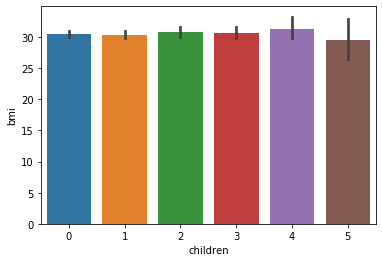

In [97]:
sns.barplot(x='children',y='bmi',data=df)